In [612]:
cd C:\Users\Ginty\Desktop\EXTRACELLULAR\170403\fwdrev

C:\Users\Ginty\Desktop\EXTRACELLULAR\170403\fwdrev


 Volume in drive C has no label.
 Volume Serial Number is EE96-75AE

 Directory of C:\Users\Ginty\Desktop\EXTRACELLULAR\170403\fwdrev

04/13/2017  11:10 AM    <DIR>          .
04/13/2017  11:10 AM    <DIR>          ..
04/04/2017  03:23 PM    <DIR>          .klustakwik2
04/04/2017  03:47 PM    <DIR>          .phy
04/04/2017  03:20 PM    <DIR>          .spikedetekt
03/29/2017  11:48 AM             6,237 A1x32-Poly3-5mm-25s-177-A32.prb
04/12/2017  02:10 PM         5,674,773 big_raster.eps
04/04/2017  09:50 AM        76,769,280 bigsquareFixedISI_170403_145552.dat
04/04/2017  09:50 AM        76,815,360 bigsquareFixedISI_170403_145650.dat
04/04/2017  09:51 AM        76,815,360 bigsquareFixedISI_170403_145750.dat
04/04/2017  09:51 AM        76,815,360 bigsquareFixedISI_170403_145851.dat
04/04/2017  09:51 AM        76,815,360 bigsquareFixedISI_170403_145951.dat
04/04/2017  09:51 AM        76,815,360 bigsquareFixedISI_170403_150051.dat
04/04/2017  09:51 AM        76,815,360 bigsquareFixedISI_17

In [439]:
%matplotlib inline
import matplotlib.pyplot as plt
import h5py as h5py
import glob as glob
import numpy as np
import scipy.io
import sys
sys.path.append('C:\\Users\\Ginty\\Desktop\\DEV\\kwik-tools')
sys.path.append('C:\\Users\\Ginty\\Desktop\\DEV\\klusta')
from klusta.kwik import KwikModel

In [440]:
kwikfile[0]

'biqsquarereversed_170403_.kwik'

In [441]:
kwikfile = glob.glob('*.kwik')
if h5py.is_hdf5(kwikfile[0]):
    k = h5py.File(kwikfile[0],'r')
    clusters = k['/channel_groups/0/spikes/clusters/main'][:]
    time_samples = k['/channel_groups/0/spikes/time_samples'][:]


In [442]:
model = KwikModel(kwikfile[0])

In [443]:
stim = scipy.io.loadmat('stim.mat')

In [444]:
stimulus_adjusted_start = [x+ 20633 / 20000.0 for x in stim['stimStart']]

In [446]:
model.cluster_groups

{3: 'unsorted',
 4: 'unsorted',
 7: 'unsorted',
 11: 'unsorted',
 12: 'unsorted',
 13: 'unsorted',
 15: 'unsorted',
 17: 'unsorted',
 19: 'unsorted',
 20: 'unsorted',
 25: 'unsorted',
 26: 'unsorted',
 34: 'unsorted',
 38: 'unsorted',
 40: 'unsorted',
 42: 'unsorted',
 45: 'unsorted',
 46: 'unsorted',
 50: 'unsorted',
 51: 'unsorted',
 52: 'unsorted',
 53: 'unsorted',
 55: 'unsorted',
 56: 'unsorted',
 57: 'unsorted',
 59: 'unsorted',
 62: 'unsorted',
 68: 'unsorted',
 71: 'unsorted',
 80: 'unsorted',
 81: 'unsorted',
 85: 'unsorted',
 88: 'unsorted',
 89: 'unsorted',
 90: 'unsorted',
 91: 'unsorted',
 92: 'unsorted',
 95: 'unsorted',
 97: 'unsorted',
 99: 'unsorted',
 100: 'unsorted',
 105: 'unsorted',
 106: 'unsorted',
 108: 'unsorted',
 109: 'unsorted',
 114: 'unsorted',
 116: 'unsorted',
 117: 'unsorted'}

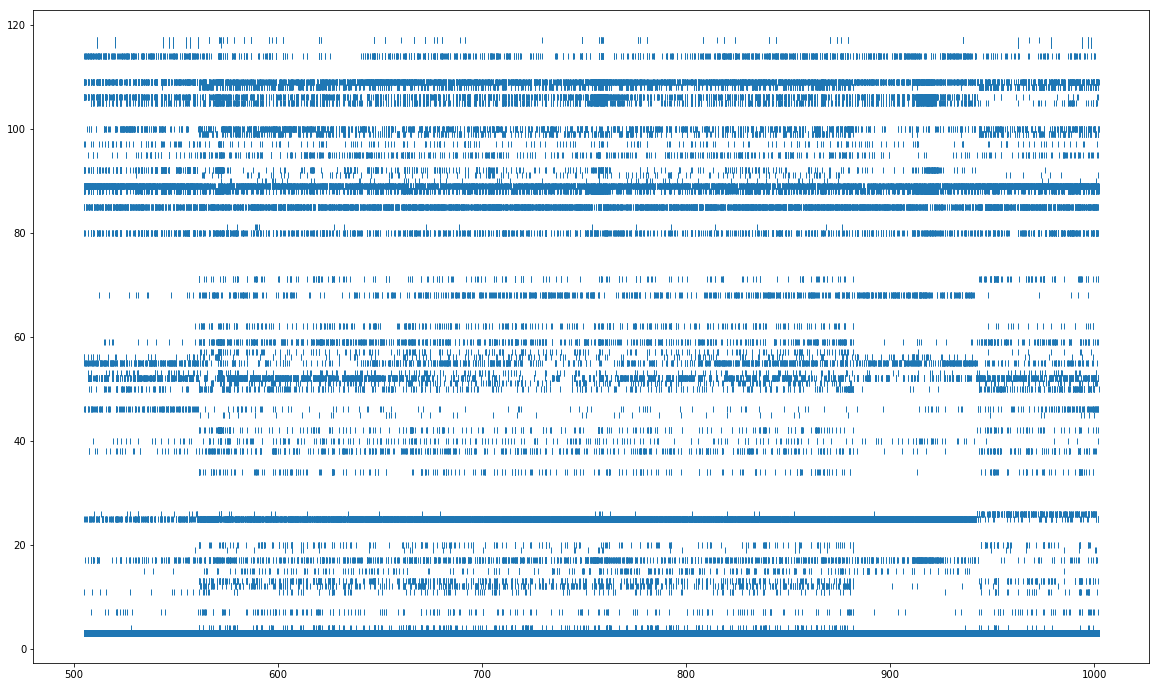

In [563]:
plt.figure(figsize=(20, 12))
plt.plot(model.spike_times[160000:460000], model.spike_clusters[160000:460000],'|')
#for s in stim['stimStart'][0:60]:
#    plt.fill([s,s+ .001,s+ .001,s], [0,0,70,70], 'b', alpha=0.2, edgecolor='r')
#plt.ylim([0,30])
#plt.savefig('big_raster.eps')

In [447]:
for c in model.cluster_ids:
    if (model.cluster_groups[c] == 2):
        print(model.cluster_groups[c])
        #plt.plot(model.spike_times, model.spike_clusters, '|')


In [570]:
spike_latency = .0024
spike_window = .04
spike_detected_x = []
spike_detected_y = []
def plotClusterRF(clusters, cluster_num, spike_times, x_laser, y_laser, stim_times):
    for i,c in enumerate(clusters):
        if c == cluster_num:
            spike_delay = (spike_times[i] - stim_times[0]) % ((stim_times[1] - stim_times[0] - .0000045 ))
            if spike_delay < spike_window and spike_delay > spike_latency: 
                stim_index = int(np.round((spike_times[i] - stim_times[0]) / (stim_times[1] - stim_times[0] - .0000045 )))
                if (stim_times[stim_index] - spike_times[i]) > 0:
                    spike_detected_x.append(x_laser[stim_index])
                    spike_detected_y.append(y_laser[stim_index])
                    plt.plot(x_laser[stim_index], y_laser[stim_index], 'o')
    #plt.plot(spike_detected_x,spike_detected_y,'o')

In [ ]:
def plotPSTH(clusters, cluster_num, spike_times, stim_times):
    spikes = []
    timepoint = []
    for i,c in enumerate(clusters):
        if c == cluster_num:
            spike_delay = (spike_times[i] - stim_times[0]) % (stim_times[1] - stim_times[0] - .0000045 )
            spikes.append(spike_delay)
            timepoint.append(spike_times[i])
    #print (cluster_num)
    plt.plot(timepoint,spikes,'o')

In [522]:
scs = []
sts = []
for i,t in enumerate(model.spike_times):
    if t < 120:
        sts.append(t)
        scs.append(model.spike_clusters[i])

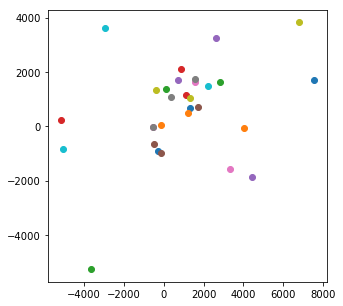

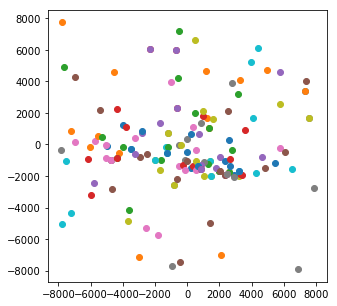

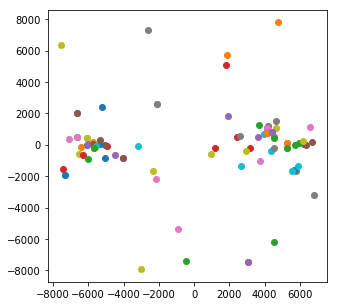

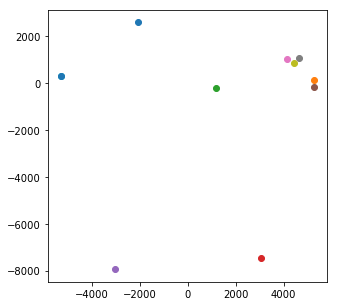

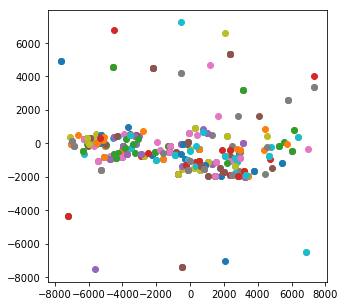

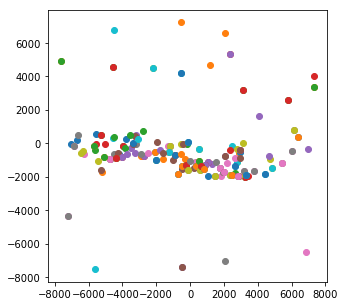

In [571]:
for c_num in goodSub120[0:6]:
    plt.figure(figsize=(5,5))
    plotClusterRF(scs, c_num,sts, stim['x1'],stim['y1'], stimulus_adjusted_start)
    plt.savefig('intervalMaps24_40_' + str(c_num) + '.eps')

In [601]:
def get_cluster_waveforms (kwik_model,cluster_id):
    try:
        if (not(type(kwik_model) is KwikModel)):
            raise ValueError       
    except ValueError:
            print ("Exception: the first argument should be a KwikModel object")
            return
        
    clusters = kwik_model.spike_clusters
    try:
        if ((not(cluster_id in clusters))):
            raise ValueError       
    except ValueError:
            print ("Exception: cluster_id (%d) not found !! " % cluster_id)
            return
    
    idx=np.argwhere (clusters==cluster_id)
    w=model.all_waveforms[idx]
    return w

def plot_cluster_waveforms (kwik_model,cluster_id,nspikes, save=False,save_path=None):
    
    w = get_cluster_waveforms (kwik_model,cluster_id)
    y_scale = .5
    x_scale = 2
    num_channels = w.shape[2]
    waveform_size = w.shape[1]
    np.random.seed()
    
    fig=plt.figure(num=None, figsize=(6, 12), dpi=200, facecolor='w', edgecolor='k')
    plt.clf()
    spike_id = np.arange(w.shape[0])
    np.random.shuffle(spike_id)
    spike_id = spike_id[0:nspikes]
    for ch in range (0,num_channels):
        x_offset = model.channel_positions [ch,0]
        y_offset = model.channel_positions [ch,1]*y_scale
        mu_spikes = np.mean(w[:,:,ch],0)
        for i in spike_id:
            spike = w[i,:,ch]
            x=x_scale*x_offset+range(0,waveform_size)
            #plt.plot (x,0.05*spike+y_offset,color="gray",alpha=0.5)
        plt.plot (x,0.05*mu_spikes+y_offset,"--",color="black",linewidth=2,alpha=0.3)
    plt.tight_layout()
    plt.show()
    if (save):
        if (save_path):
            filename = "%s/waveform_%02d.pdf" % (save_path,cluster_id)
        else:
            filename = "waveform_%02d.pdf" % cluster_id
        fig.savefig (filename)


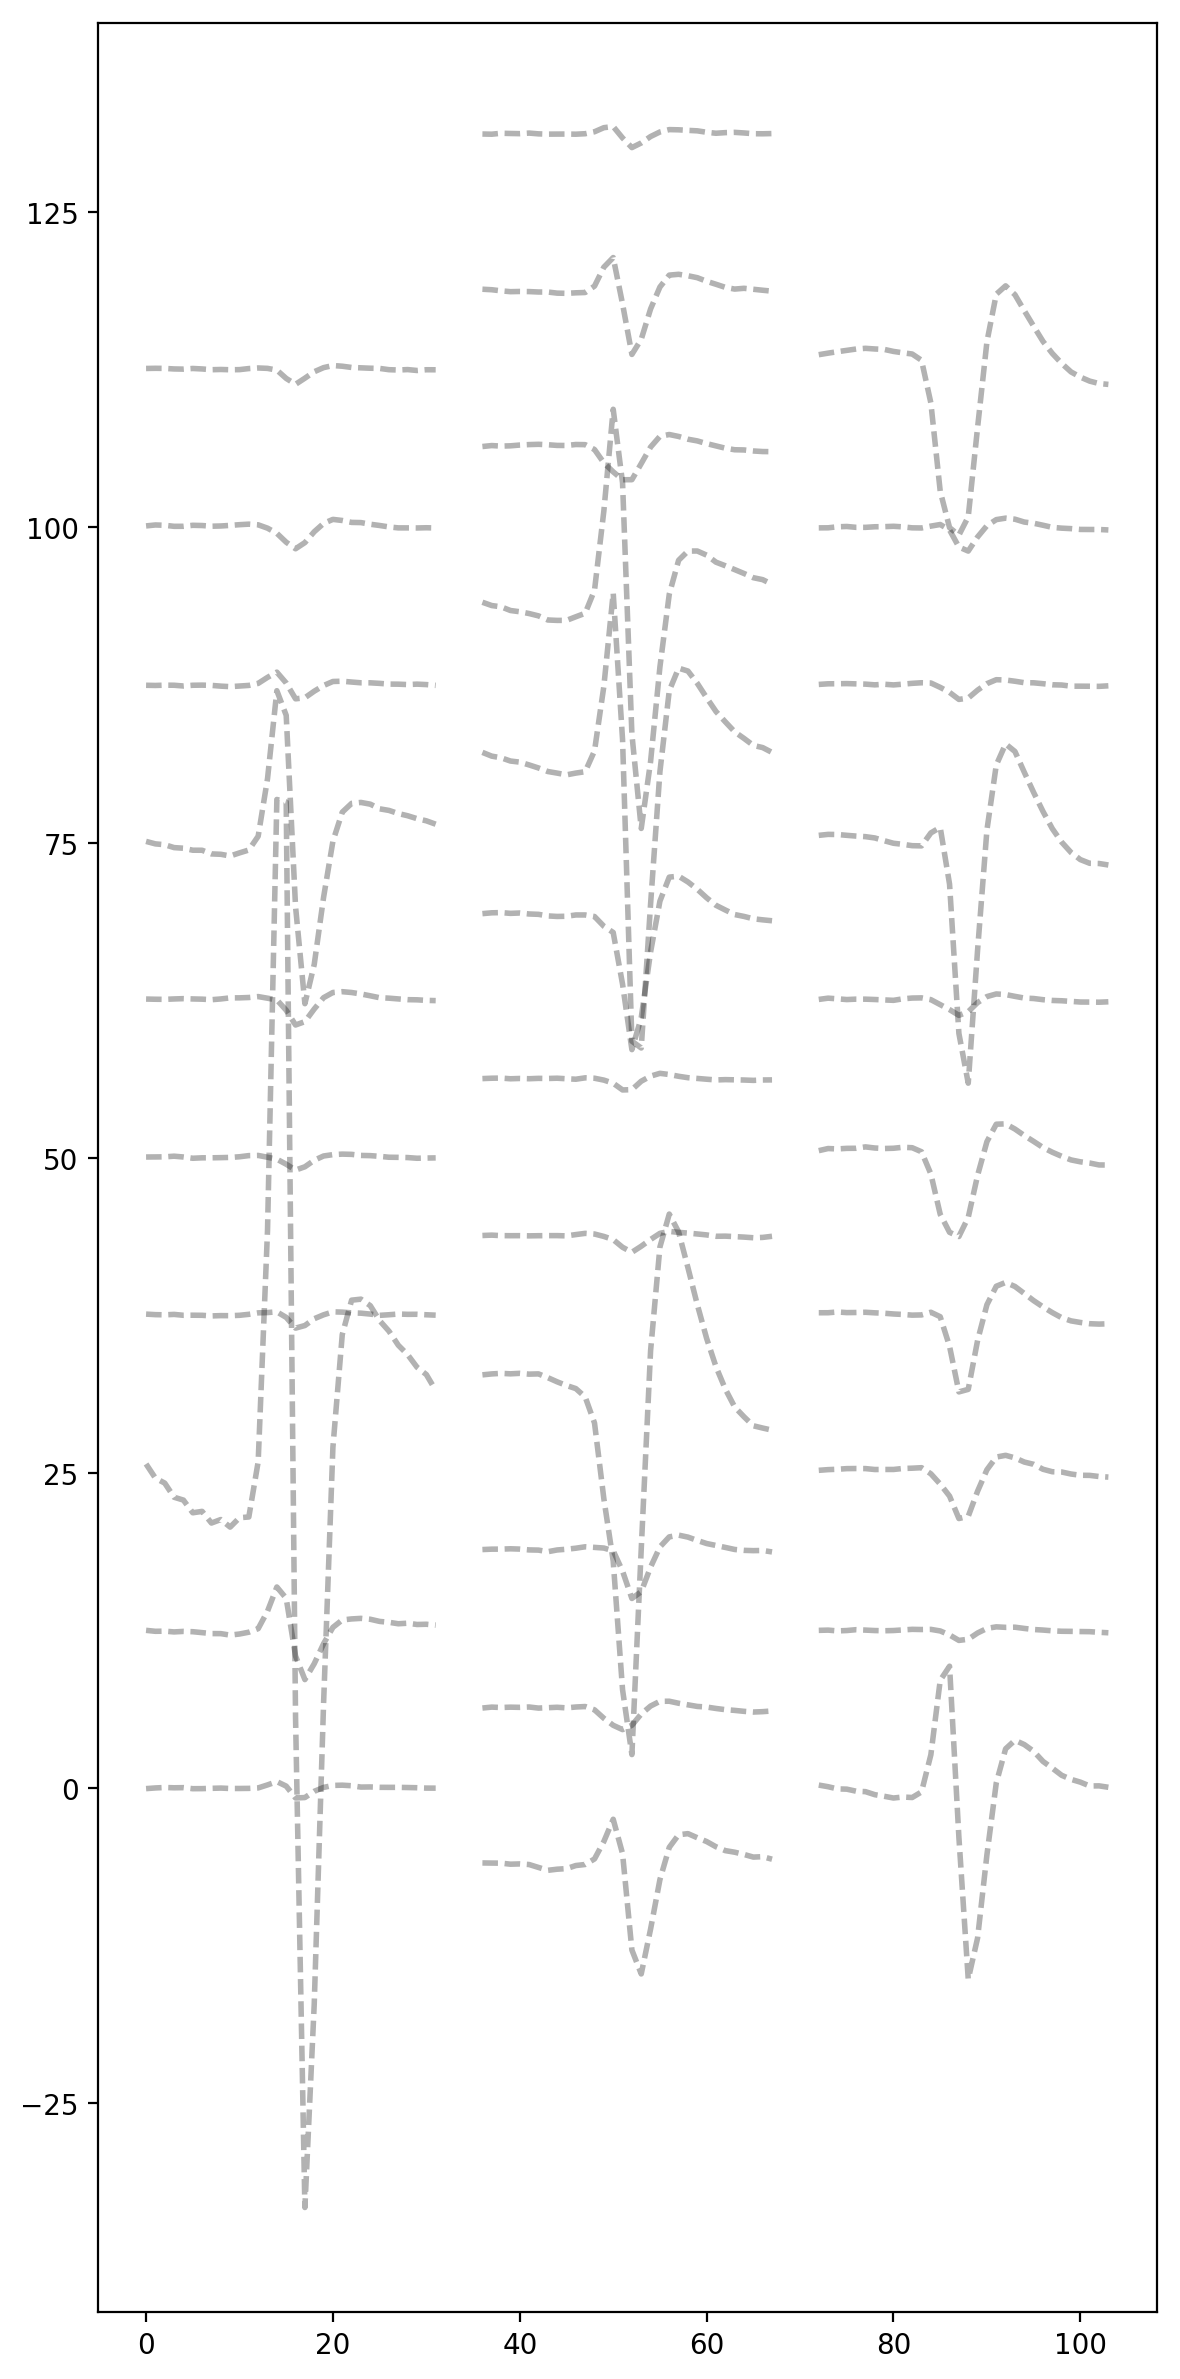

In [607]:
plot_cluster_waveforms(model, goodSub120[5], 20, True)

11
12
50
45
108
99


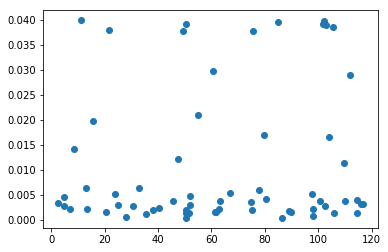

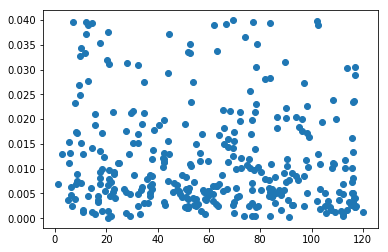

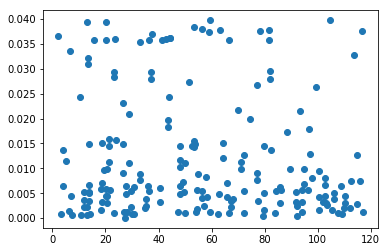

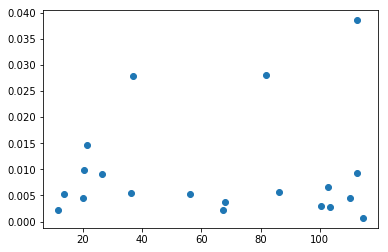

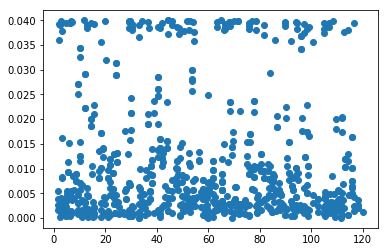

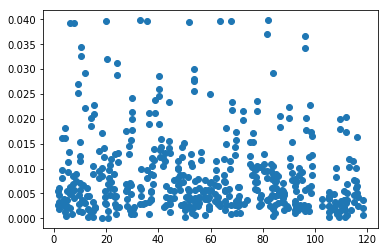

In [608]:
for c_num in goodSub120:
    plt.figure()
    plotPSTH(scs, c_num, sts, stimulus_adjusted_start)
    plt.savefig('PSTHs' + str(c_num) + '.eps')

In [510]:
goodSub120 = [11,12,50,45,108, 99]
good440 = [4,7,11,12,13,20,34,38,42,45,51,57,59,63,71,90,91,99,109]

In [148]:
def clusterTimes(clusters, cluster_num, spike_times, x_laser, y_laser, stim_times):
    for i,c in enumerate(clusters):
        if c == cluster_num:
            spike_delay = (spike_times[i] - stim_times[0]) % (stim_times[1] - stim_times[0])
            if spike_delay < spike_window and spike_delay > spike_latency: 
                stim_index = int(np.round((spike_times[i] - stim_times[0]) / (stim_times[1] - stim_times[0])))
                if (stim_times[stim_index] - spike_times[i]) > 0 and (stim_times[stim_index] - spike_times[i]) < 1 :
                    plt.plot((stim_times[stim_index] - spike_times[i]), 'o')

In [172]:
spike_latency = .005
spike_window = .03
plt.hold
def plotClusterXY(clusters, cluster_num, spike_times, x_laser, y_laser, stim_times):
    for i,c in enumerate(clusters):
        if c == cluster_num:
            spike_delay = (spike_times[i] - stim_times[0]) % (stim_times[1] - stim_times[0])
            if spike_delay < spike_window and spike_delay > spike_latency: 
                stim_index = int(np.round((spike_times[i] - stim_times[0]) / (stim_times[1] - stim_times[0])))
                if (stim_times[stim_index] - spike_times[i]) > 0:
                    plt.plot(x_laser[stim_index:stim_index + 1],y_laser[stim_index:stim_index + 1],'o')

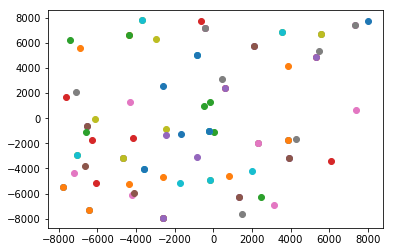

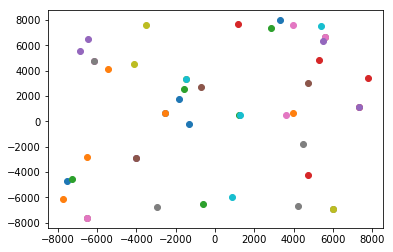

In [173]:
for c_num in great:
    plt.figure()
    plotClusterXY(clusters[0:120000], c_num, spike_times[0:120000], stim['x1'],stim['y1'], stim['stimStart'])

In [3]:
stim = scipy.io.loadmat('acquireIntanBrush_170412 0941 59.mat')

In [48]:
import glob as glob
import re
def load_intan_input_channels(di_files, ai_files):
    #save digital inputs
    p = re.compile('chan(\d+).di')  #extract digital input channel ids
    channel_ids = p.findall(' '.join(di_files))
    #load in each channel and concatenate.
    digital_inputs = {}
    for ch in channel_ids:
        files = glob.glob('*chan' + ch + '.di')
        for f in files:
            if ch in digital_inputs: #load first array
                digital_inputs[ch] = digital_inputs[ch].append(np.fromfile(f, dtype=np.uint)) 
            else:  #concatenation relies on alphabetical ordering corresponding to temporal order
                digital_inputs[ch] = np.fromfile(f, dtype=np.uint)

    #save analog inputs
    p = re.compile('chan(\d+).ai')  #extract analog input channel ids
    channel_ids = p.findall(' '.join(glob.glob('*.ai')))
    #load in each channel and concatenate.
    analog_inputs = {}
    for ch in channel_ids:
        files = glob.glob('*chan' + ch + '.ai')
        for f in files:
            if ch in analog_inputs: #load first array
                analog_inputs[ch] = digital_inputs[ch].append(np.fromfile(f, dtype=np.uint16)) 
            else:  #concatenation relies on alphabetical ordering corresponding to temporal order
                analog_inputs[ch] = np.fromfile(f, dtype=np.uint16)
    return digital_inputs, analog_inputs

In [610]:
di_files = glob.glob('*.di')

In [611]:
di_files

[]

In [49]:
[di,ai] = load_intan_input_channels()

In [50]:
glob.glob('*chan' + '0' + '.di')

['sync_170412_094139chan0.di']

KeyError: 'time'

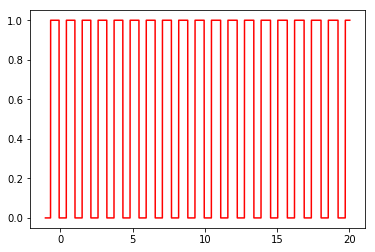

In [403]:
lh = 0
rh = 2500000
delay = 20633 / 20000.0
stretch = 1.0000045 
inTime = np.linspace(-delay, (len(di['1']) / 20000.0 - delay) * stretch, len(di['1']) )
inSync = di['1']
plt.plot(inTime[lh:rh], inSync[lh:rh],'r')
#plt.plot(inSync[lh:rh],'r')
NItime = stim['time'][:,0]
NIsync = stim['data'][:,1]
plt.plot(NItime[lh:rh], NIsync[lh:rh])
#plt.plot(NIsync[lh + 1130:rh])

In [145]:
def find_sync_bounds(trace):
    thresh = 1.0 
    trace = np.diff(trace)
    thresh = np.ones_like(trace) * thresh

    high, = np.where((trace[:-1] < thresh[:-1]) & (trace[1:] > thresh[1:]))
    thresh = thresh * -1.0
    low, = np.where((trace[:-1] > thresh[:-1]) & (trace[1:] < thresh[1:]))
    return list(high),list(low)

In [187]:
[high, low] = find_sync_bounds(inSync)

In [188]:
highIn = np.diff(high)

In [189]:
(highIn, highNI)

(array([21906, 22007, 22107, 22206, 22307, 22407, 22506, 22607, 22707,
        22807, 22907, 23007, 23107, 23207, 23307, 23407, 23507], dtype=int64),
 array([21907, 22007, 22107, 22207, 22307, 22407, 22507, 22607, 22707,
        22807, 22907, 23007, 23107, 23208, 23307, 23407, 23508], dtype=int64))

In [168]:
[high - low for (high,low) in zip(high, low)]

[-11904,
 -12004,
 -12104,
 -12204,
 -12304,
 -12404,
 -12503,
 -12604,
 -12704,
 -12804,
 -12904,
 -13004,
 -13104,
 -13204,
 -13304,
 -13404,
 -13504]

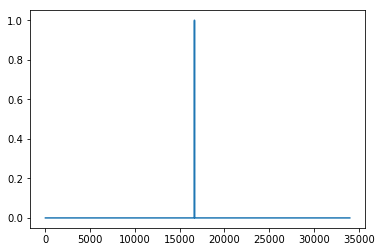

In [262]:
plt.plot(di['0'][4000:38000])

In [47]:
len(np.fromfile('sync_170412_094139chan0.di', dtype=np.uint16))

842400

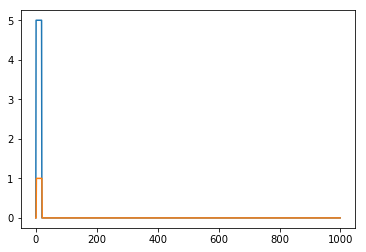

In [289]:
plt.plot(stim['trigger'][0:1000])
plt.plot(di['0'][20633:21633])

In [266]:
stim

{'Fs': array([[20000]], dtype=uint16),
 '__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Wed Apr 12 09:41:59 2017',
 '__version__': '1.0',
 'data': array([[  3.21709276e+00,   2.88276200e-03],
        [  3.21709276e+00,   2.56693600e-03],
        [  3.21804885e+00,   2.25111000e-03],
        ..., 
        [  3.24386347e+00,   2.48527512e+00],
        [  3.24290737e+00,   2.48495930e+00],
        [  3.24322607e+00,   2.48495930e+00]]),
 'stimulus': array(['acquireIntanBrush'], 
       dtype='<U17'),
 'time': array([[  0.00000000e+00],
        [  5.00000000e-05],
        [  1.00000000e-04],
        ..., 
        [  1.99998500e+01],
        [  1.99999000e+01],
        [  1.99999500e+01]]),
 'trigger': array([[0],
        [5],
        [5],
        ..., 
        [0],
        [0],
        [0]], dtype=uint8)}